<h1 style="text-align: center;">Deep Learning<br><br>Regression with ANN (in comparison with ML)<br><br>King County, USA House Sales Price Prediction<br><h1>

##### This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

We will be using a dataset from Kaggle:

https://www.kaggle.com/harlfoxem/housesalesprediction

**Feature Columns:**
    
1. id - Unique ID for each home sold
2. date - Date of the home sale
3. price - Price of each home sold
4. bedrooms - Number of bedrooms
5. bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
6. sqft_living - Square footage of the apartments interior living space
7. sqft_lot - Square footage of the land space
8. floors - Number of floors
9. waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
10. view - An index from 0 to 4 of how good the view of the property was
11. condition - An index from 1 to 5 on the condition of the apartment,
12. grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
13. sqft_above - The square footage of the interior housing space that is above ground level
14. sqft_basement - The square footage of the interior housing space that is below ground level
15. yr_built - The year the house was initially built
16. yr_renovated - The year of the house’s last renovation
17. zipcode - What zipcode area the house is in
18. lat - Lattitude
19. long - Longitude
20. sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
21. sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

# Keras Regression

In [15]:
try:
    import jupyter_black
    jupyter_black.load()
except ImportError:
    print('You can safely ignore this.')

You can safely ignore this.


In [16]:
import os

# Set tensorflow log level to ignore INFOs.
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Uncomment the following lines if you want to suppress warnings:
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Set it to None to display all rows in the dataframe:
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe:
pd.set_option("display.max_columns", None)

In [18]:
# Get python version
!python --version

Python 3.9.7


In [19]:
# Get tensorflow version
import tensorflow as tf

tf.__version__

'2.10.1'

In [20]:
# List cuda-capable gpu's that are attached to this session
if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("This session will run on CPU.")

GPU support is enabled for this session.


In [21]:
# Get more information about gpu (if available)
if tf.config.list_physical_devices("GPU"):
    !nvidia-smi

Fri May  3 18:07:45 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 546.09                 Driver Version: 546.09       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 2060      WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   77C    P0              26W /  80W |   1010MiB /  6144MiB |     18%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [22]:
# !pip install folium
#!conda install folium -c conda-forge
# Conda is preferred

In [23]:
# If importing data from google drive, import drive from google.colab and mount your drive to the session
# from google.colab import drive
# drive.mount('/content/drive')

In [24]:
# Make sure the provide the correct path if drive is mounted
# df = pd.read_csv("/content/drive/MyDrive/kc_house_data.csv")

In [25]:
# when working on local
path = r"kc_house_data.csv"
df = pd.read_csv(path)

In [26]:
# from matplotlib import style
# style.use('dark_background')

## Exploratory Data Analysis and Visualization

In [27]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [29]:
df.isnull().sum().any()

False

In [30]:
df.duplicated().sum()

0

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21597.000,4580474287.771,2876735715.748,1000102.000,2123049175.000,3904930410.000,7308900490.000,9900000190.000
price,21597.000,540296.574,367368.140,78000.000,322000.000,450000.000,645000.000,7700000.000
bedrooms,21597.000,3.373,0.926,1.000,3.000,3.000,4.000,33.000
bathrooms,21597.000,2.116,0.769,0.500,1.750,2.250,2.500,8.000
sqft_living,21597.000,2080.322,918.106,370.000,1430.000,1910.000,2550.000,13540.000
sqft_lot,21597.000,15099.409,41412.637,520.000,5040.000,7618.000,10685.000,1651359.000
floors,21597.000,1.494,0.540,1.000,1.000,1.500,2.000,3.500
waterfront,21597.000,0.008,0.087,0.000,0.000,0.000,0.000,1.000
view,21597.000,0.234,0.766,0.000,0.000,0.000,0.000,4.000
condition,21597.000,3.410,0.651,1.000,3.000,3.000,4.000,5.000


### id_number

In [32]:
# We must drop the id column otherwise data leakeage occurs. Thme model checks each unique value and adjust metrics accordingly, learns every bit of data but during test it fails
df = df.drop("id", axis=1)

### price

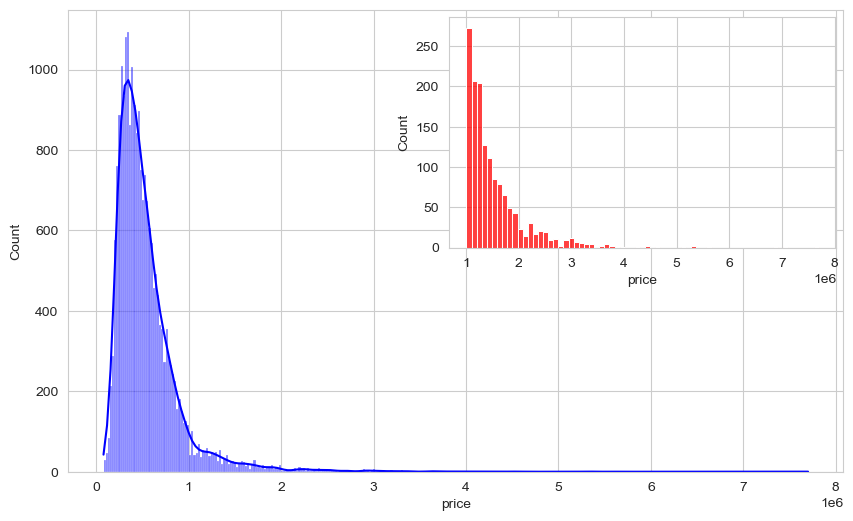

In [33]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig, ax = plt.subplots(figsize=(10, 6))

# Create the original histogram
sns.histplot(df["price"], kde=True, color="b", ax=ax)

# Create the inset axes
axins = inset_axes(ax, width="50%", height="50%", loc="upper right")

# Create the zoomed histogram on the inset axes
sns.histplot(df[df["price"] > 1000000], x="price", color="r", ax=axins)
# axins.set_xlim(0, 5000)
# axins.set_ylim(0, 1000)

plt.show()

In [34]:
df[df["price"] > 3000000].sort_values(by="price", ascending=False)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,10/13/2014,7700000.000,6,8.000,12050,27600,2.500,0,3,4,13,8570,3480,1910,1987,98102,47.630,-122.323,3940,8800
3910,6/11/2014,7060000.000,5,4.500,10040,37325,2.000,1,2,3,11,7680,2360,1940,2001,98004,47.650,-122.214,3930,25449
9245,9/19/2014,6890000.000,6,7.750,9890,31374,2.000,0,4,3,13,8860,1030,2001,0,98039,47.630,-122.240,4540,42730
4407,8/4/2014,5570000.000,5,5.750,9200,35069,2.000,0,0,3,13,6200,3000,2001,0,98039,47.629,-122.233,3560,24345
1446,4/13/2015,5350000.000,5,5.000,8000,23985,2.000,0,4,3,12,6720,1280,2009,0,98004,47.623,-122.220,4600,21750
1313,4/13/2015,5300000.000,6,6.000,7390,24829,2.000,1,4,4,12,5000,2390,1991,0,98040,47.563,-122.210,4320,24619
1162,10/20/2014,5110000.000,5,5.250,8010,45517,2.000,1,4,3,12,5990,2020,1999,0,98033,47.677,-122.211,3430,26788
8085,6/17/2014,4670000.000,5,6.750,9640,13068,1.000,1,4,3,12,4820,4820,1983,2009,98040,47.557,-122.210,3270,10454
2624,8/15/2014,4500000.000,5,5.500,6640,40014,2.000,1,4,3,12,6350,290,2004,0,98155,47.749,-122.280,3030,23408
8629,6/18/2014,4490000.000,4,3.000,6430,27517,2.000,0,0,3,12,6430,0,2001,0,98004,47.621,-122.219,3720,14592


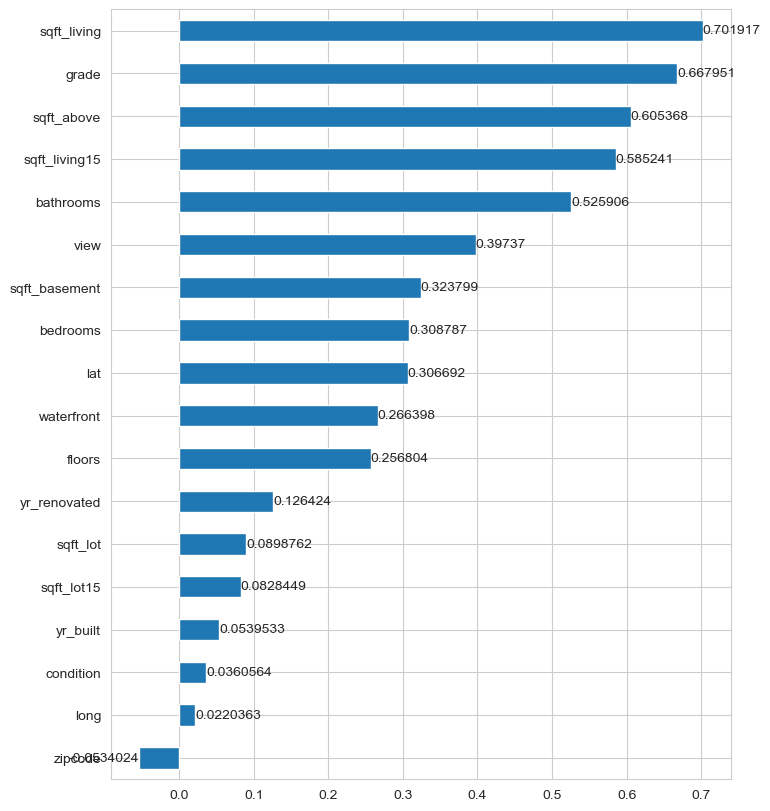

In [35]:
plt.figure(figsize=(8, 10))
ax = df.corr(numeric_only=True)["price"].sort_values().drop("price").plot(kind="barh")
ax.bar_label(ax.containers[0])
plt.show()

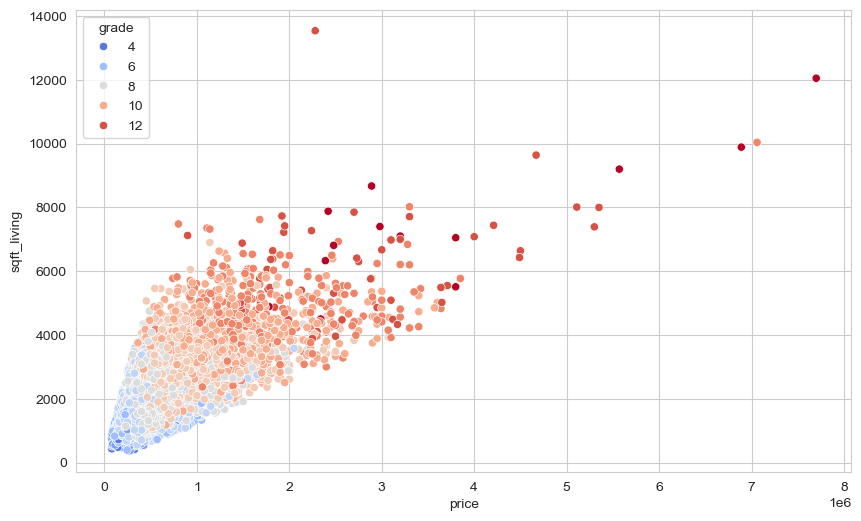

In [36]:
sns.scatterplot(x="price", y="sqft_living", data=df, hue="grade", palette="coolwarm")
plt.show()

### bedrooms

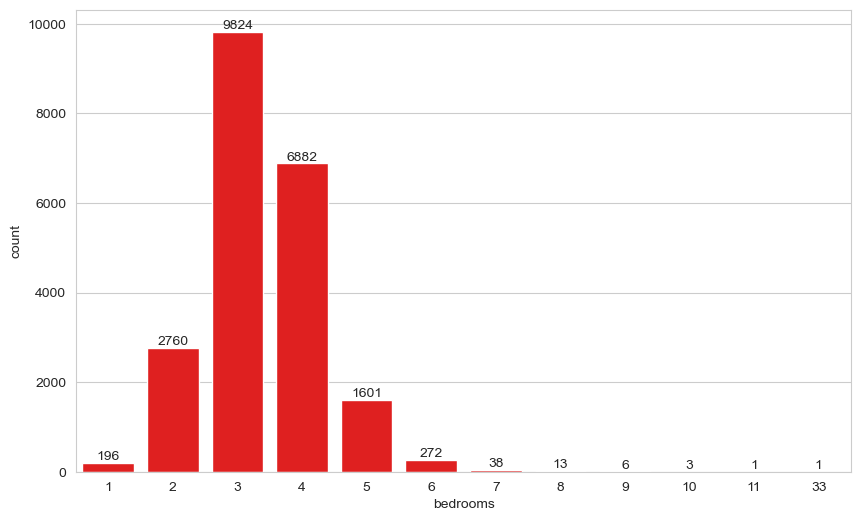

In [37]:
ax = sns.countplot(x=df["bedrooms"], color="r")
ax.bar_label(ax.containers[0])
plt.show()

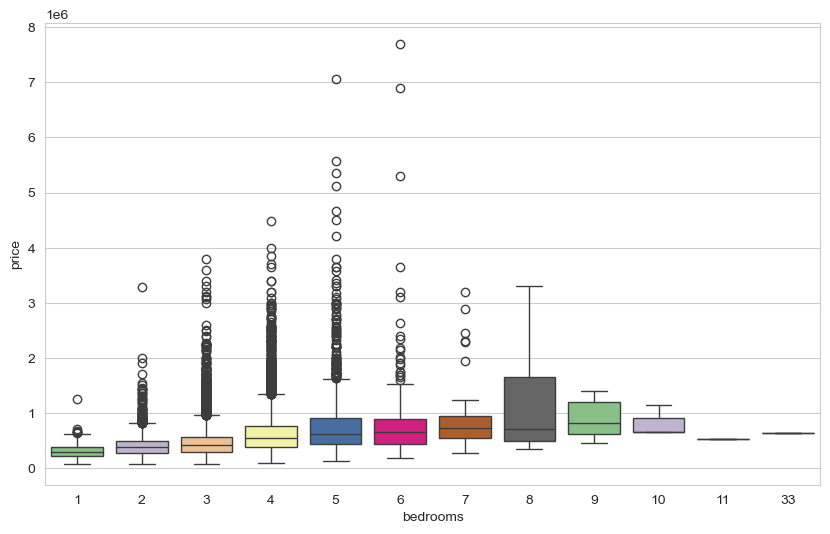

In [38]:
sns.boxplot(x="bedrooms", y="price", data=df, palette="Accent")
plt.show()

In [39]:
df[df["bedrooms"] > 10]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8748,8/21/2014,520000.000,11,3.000,3000,4960,2.000,0,0,3,7,2400,600,1918,1999,98106,47.556,-122.363,1420,4960
15856,6/25/2014,640000.000,33,1.750,1620,6000,1.000,0,0,5,7,1040,580,1947,0,98103,47.688,-122.331,1330,4700


In [40]:
# When an outlier is a typo drop it. a haouse with 33 rooms is a typo
df = df[df["bedrooms"] != 33]

Most likely the data was entered incorrectly.

In [41]:
df.shape

(21596, 20)

### date

In [42]:
df["date"].dtype

dtype('O')

In [43]:
df["date"] = pd.to_datetime(df["date"])

In [44]:
df["date"]

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21596, dtype: datetime64[ns]

In [45]:
df["year"] = df["date"].dt.year
# df['year'] = df['date'].apply(lambda date: date.year)
# Avoid using the apply method as it is almost 14x slower.

In [46]:
%%timeit
df["date"].dt.year

2.77 ms ± 597 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [47]:
%%timeit
df["date"].apply(lambda date: date.year)

34.5 ms ± 3.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [48]:
df["month"] = df["date"].dt.month

In [49]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650,2014,10
1,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639,2014,12
2,2015-02-25,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062,2015,2
3,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000,2014,12
4,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503,2015,2


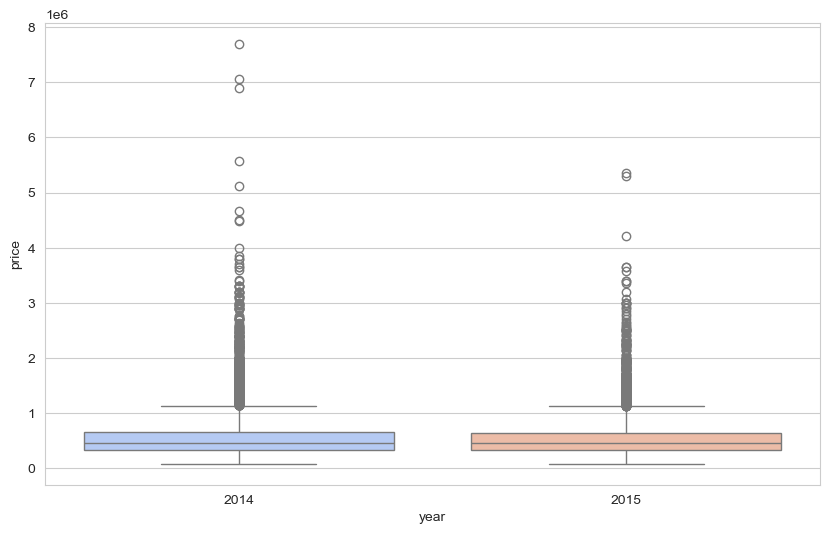

In [50]:
sns.boxplot(y="price", x="year", data=df, palette="coolwarm")
plt.show()

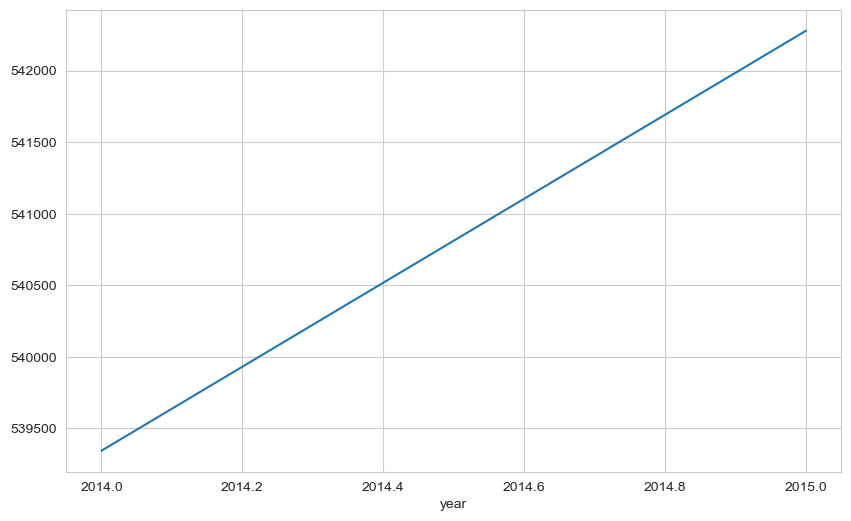

In [51]:
df.groupby("year")["price"].mean().plot()
plt.show()

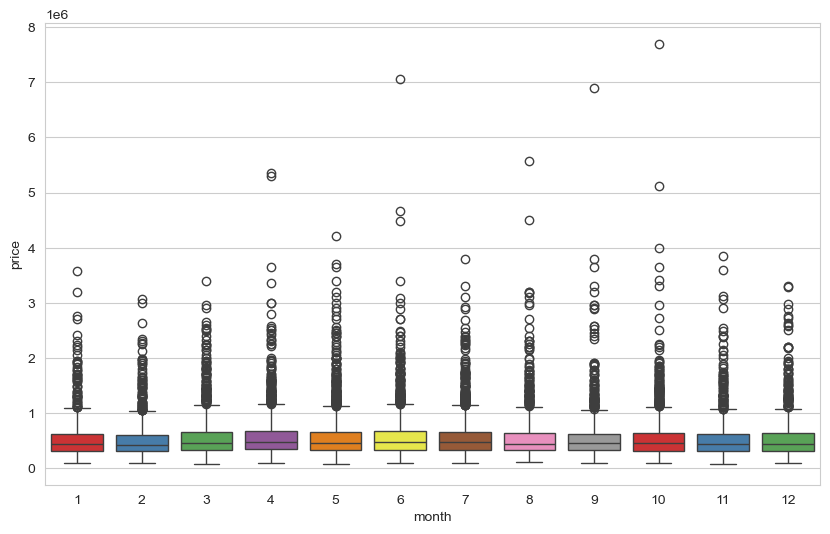

In [52]:
sns.boxplot(x="month", y="price", data=df, palette="Set1")
plt.show()

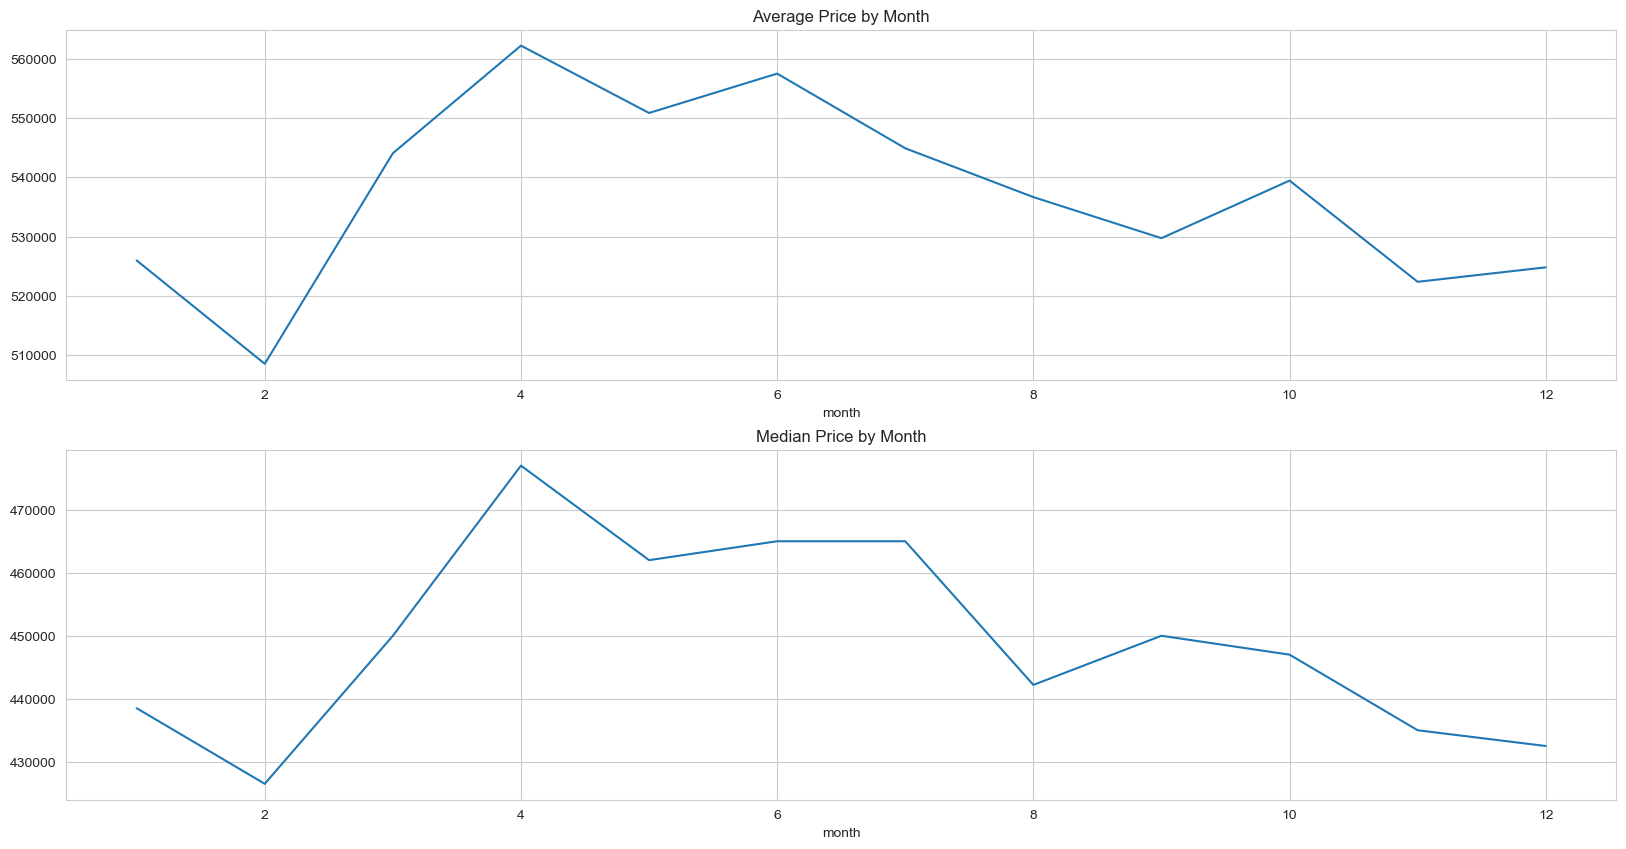

In [53]:
fig, ax = plt.subplots(2, 1, figsize=(20, 10))
df.groupby("month")["price"].mean().plot(title="Average Price by Month", ax=ax[0])
df.groupby("month")["price"].median().plot(title="Median Price by Month", ax=ax[1])
plt.show()

In [54]:
df = df.drop(["date", "year", "month"], axis=1)

### zipcode

In [55]:
df["zipcode"].value_counts(dropna=False)

zipcode
98103    601
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: count, Length: 70, dtype: int64

If you want to keep zipcodes, look into [hash encoding](https://medium.com/flutter-community/dealing-with-categorical-features-with-high-cardinality-feature-hashing-7c406ff867cb).

In [56]:
df = df.drop("zipcode", axis=1)

### yr_renovated & yr_built

In [57]:
df["yr_renovated"].value_counts(dropna=False)

yr_renovated
0       20682
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: count, Length: 70, dtype: int64

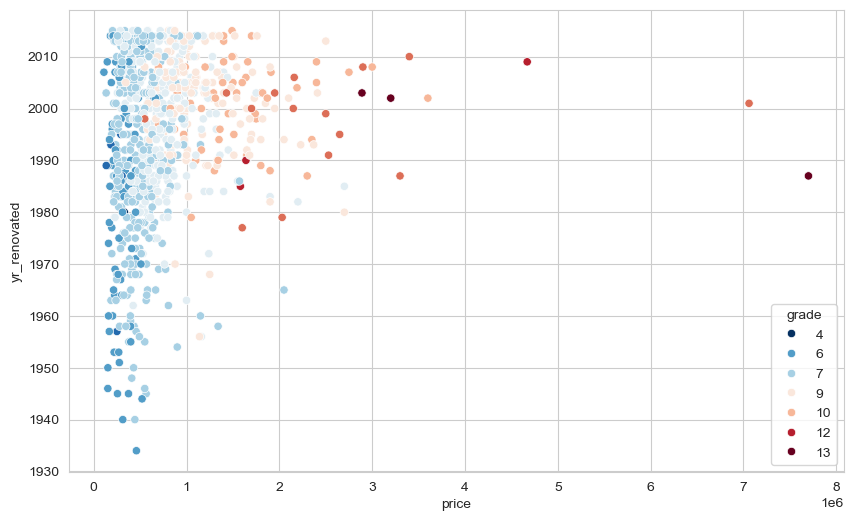

In [58]:
sns.scatterplot(x="price", y="yr_renovated", data=df[df.yr_renovated != 0], hue="grade", palette="RdBu_r")
plt.show()

yr_built
2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: count, Length: 116, dtype: int64

<Axes: title={'center': 'yr_built'}, xlabel='yr_built'>

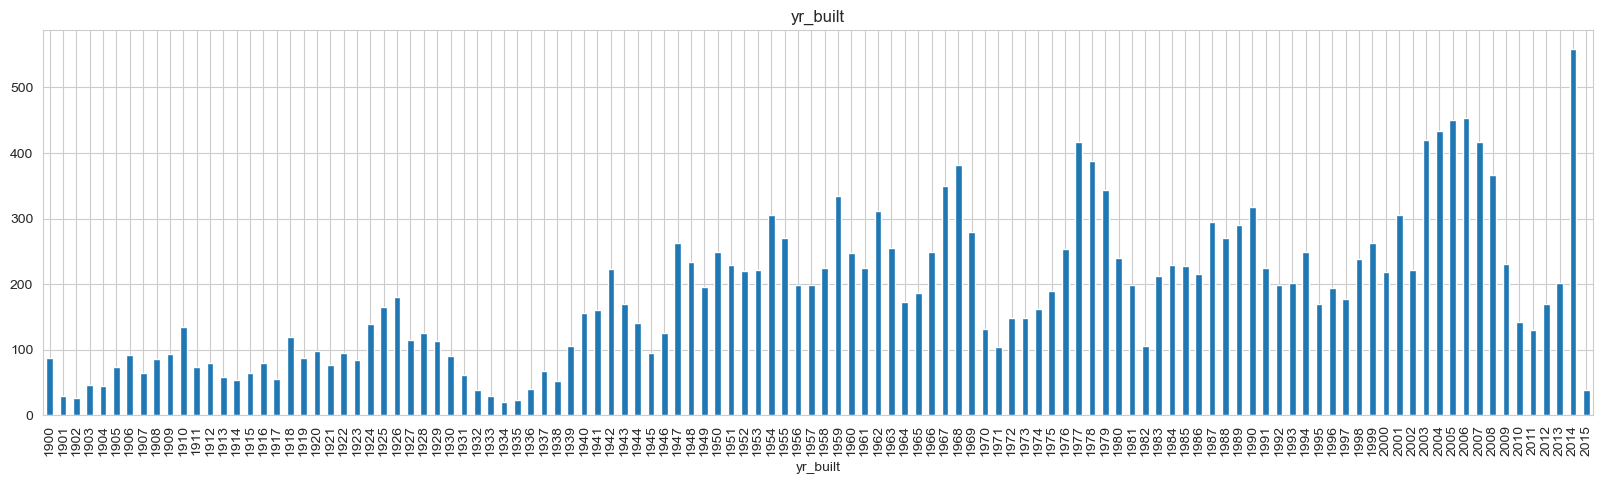

In [59]:
display(df["yr_built"].value_counts(dropna=False))
df["yr_built"].value_counts(dropna=False).sort_index().plot.bar(figsize=(20, 5), title="yr_built")

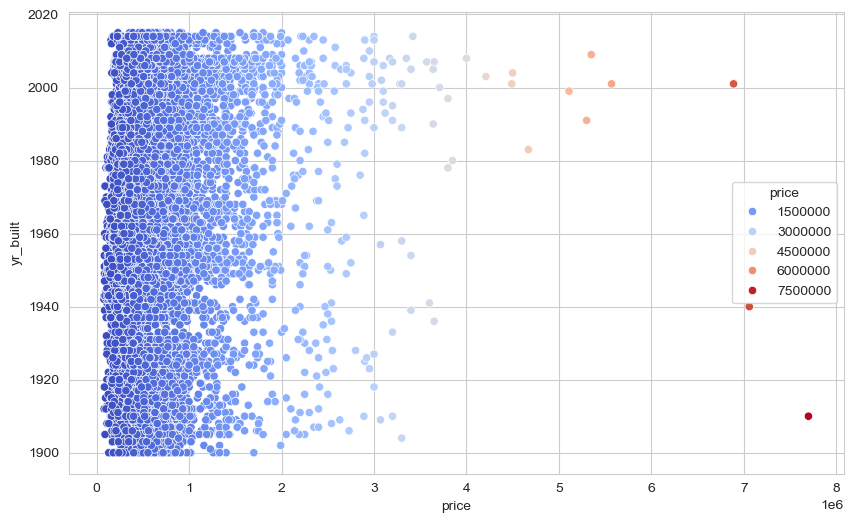

In [60]:
sns.scatterplot(x="price", y="yr_built", hue="price", data=df, palette="coolwarm")
plt.show()


In [61]:
df.yr_renovated.apply(lambda x: x if x == 0 else 1).value_counts()

yr_renovated
0    20682
1      914
Name: count, dtype: int64

In [62]:
df["renovated"] = df.yr_renovated.apply(lambda x: x if x == 0 else 1)

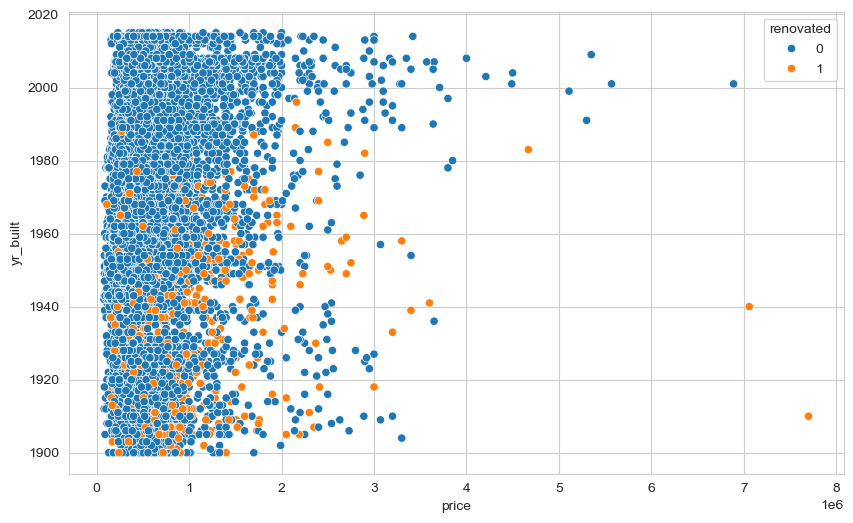

In [63]:
# We see that renovation has no effect on price
sns.scatterplot(x="price", y="yr_built", data=df, hue="renovated")
plt.show()

In [64]:
df["built|renovated"] = df["yr_renovated"].replace(0, np.nan).fillna(df["yr_built"])
df["built|renovated"]

0       1955.000
1       1991.000
2       1933.000
3       1965.000
4       1987.000
          ...   
21592   2009.000
21593   2014.000
21594   2009.000
21595   2004.000
21596   2008.000
Name: built|renovated, Length: 21596, dtype: float64

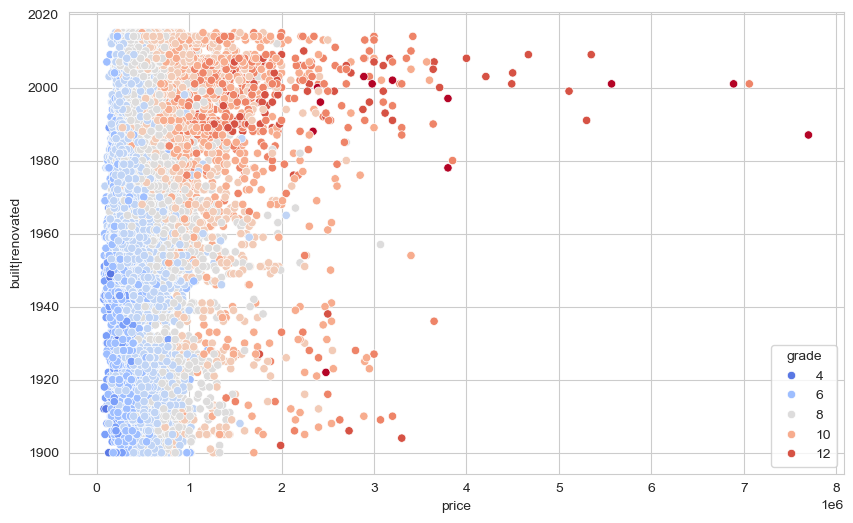

In [65]:
sns.scatterplot(x="price", y="built|renovated", data=df, hue="grade", palette="coolwarm")
plt.show()

In [66]:
df.drop(["yr_renovated", "yr_built", "renovated"], axis=1, inplace=True)

### sqft_basement

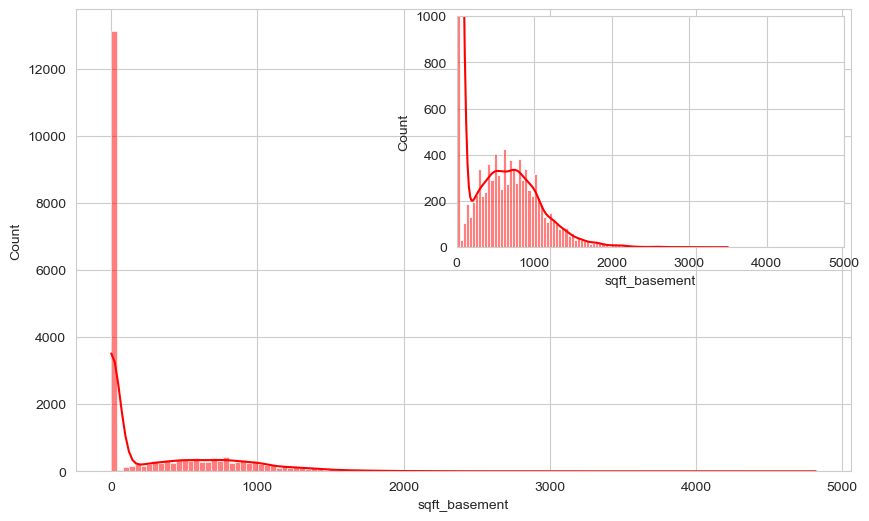

In [67]:
fig, ax = plt.subplots(figsize=(10, 6))

# Create the original histogram
sns.histplot(df["sqft_basement"], kde=True, color="r", ax=ax)

# Create the inset axes
axins = inset_axes(ax, width="50%", height="50%", loc="upper right")

# Create the zoomed histogram on the inset axes
sns.histplot(df[df["sqft_basement"] < 4000], x="sqft_basement", kde=True, color="r", ax=axins)
axins.set_xlim(0, 5000)
axins.set_ylim(0, 1000)

plt.show()


In [68]:
df[df["sqft_basement"] > 3000].sort_values(by="sqft_basement", ascending=False)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,built|renovated
8085,4670000.000,5,6.750,9640,13068,1.000,1,4,3,12,4820,4820,47.557,-122.210,3270,10454,2009.000
12764,2280000.000,7,8.000,13540,307752,3.000,0,4,3,12,9410,4130,47.667,-121.986,4850,217800,1999.000
15468,3200000.000,4,3.250,7000,28206,1.000,1,4,4,12,3500,3500,47.593,-122.086,4913,14663,1991.000
7245,7700000.000,6,8.000,12050,27600,2.500,0,3,4,13,8570,3480,47.630,-122.323,3940,8800,1987.000
10074,1900000.000,5,4.250,6510,16471,2.000,0,3,4,11,3250,3260,47.576,-122.242,4480,16471,1980.000


### sqft_above

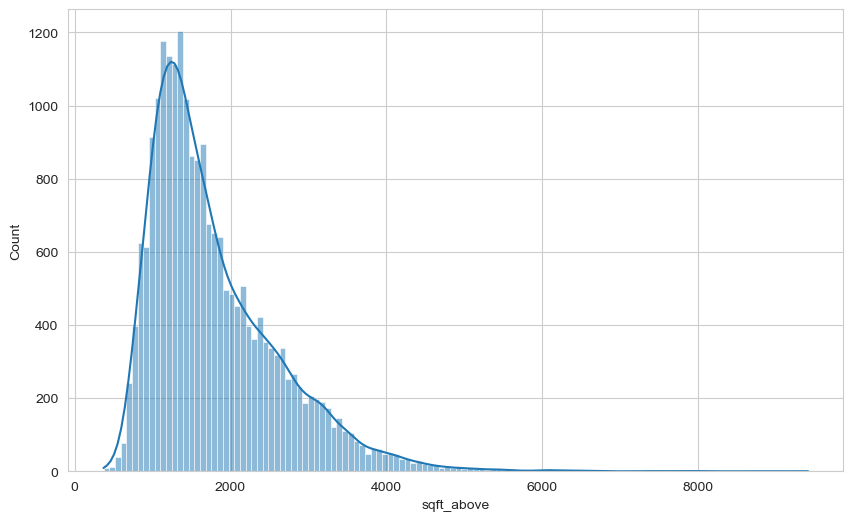

In [69]:
sns.histplot(df["sqft_above"], kde=True)
plt.show()

In [70]:
df[df["sqft_above"] > 6000].sort_values(by="sqft_above", ascending=False)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,built|renovated
12764,2280000.000,7,8.000,13540,307752,3.000,0,4,3,12,9410,4130,47.667,-121.986,4850,217800,1999.000
9245,6890000.000,6,7.750,9890,31374,2.000,0,4,3,13,8860,1030,47.630,-122.240,4540,42730,2001.000
7245,7700000.000,6,8.000,12050,27600,2.500,0,3,4,13,8570,3480,47.630,-122.323,3940,8800,1987.000
18288,3300000.000,5,6.250,8020,21738,2.000,0,0,3,11,8020,0,47.568,-122.189,4160,18969,2001.000
13398,2420000.000,5,4.750,7880,24250,2.000,0,2,3,13,7880,0,47.733,-122.362,2740,10761,1996.000
19842,2700000.000,4,4.000,7850,89651,2.000,0,0,3,12,7850,0,47.541,-121.982,6210,95832,2006.000
3910,7060000.000,5,4.500,10040,37325,2.000,1,2,3,11,7680,2360,47.650,-122.214,3930,25449,2001.000
11859,1950000.000,4,3.250,7420,167869,2.000,0,3,3,12,7420,0,47.455,-121.764,5610,169549,2002.000
18579,1140000.000,5,4.000,7320,217800,2.000,0,0,3,11,7320,0,47.447,-122.086,3270,34500,1992.000
1446,5350000.000,5,5.000,8000,23985,2.000,0,4,3,12,6720,1280,47.623,-122.220,4600,21750,2009.000


### Geographical Properties

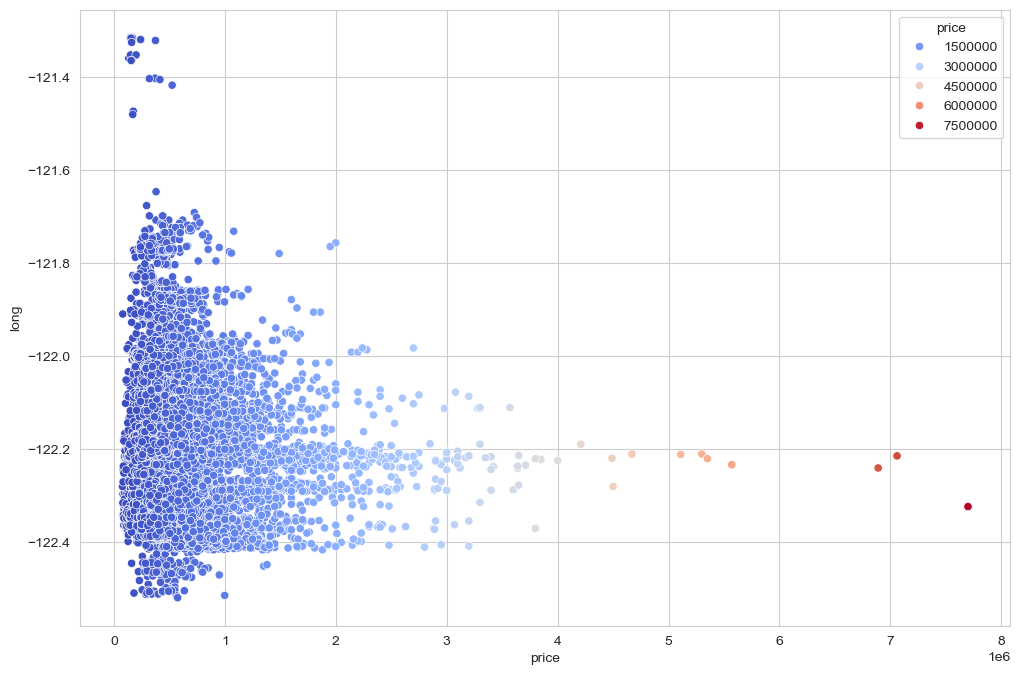

In [71]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x="price", y="long", hue="price", data=df, palette="coolwarm")
plt.show()

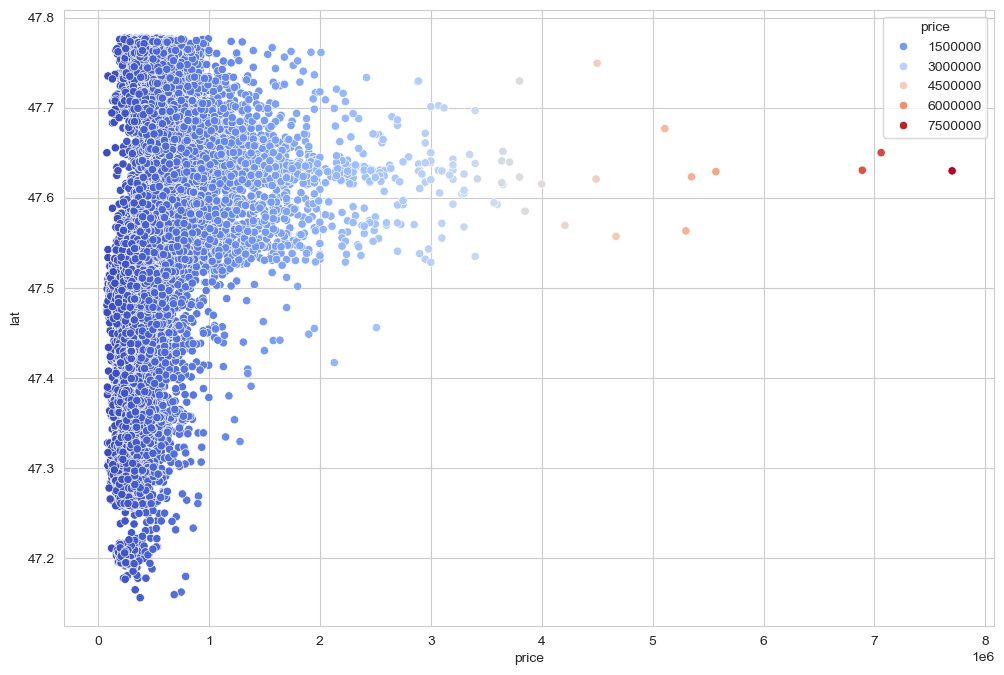

In [72]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x="price", y="lat", hue="price", data=df, palette="coolwarm")
plt.show()

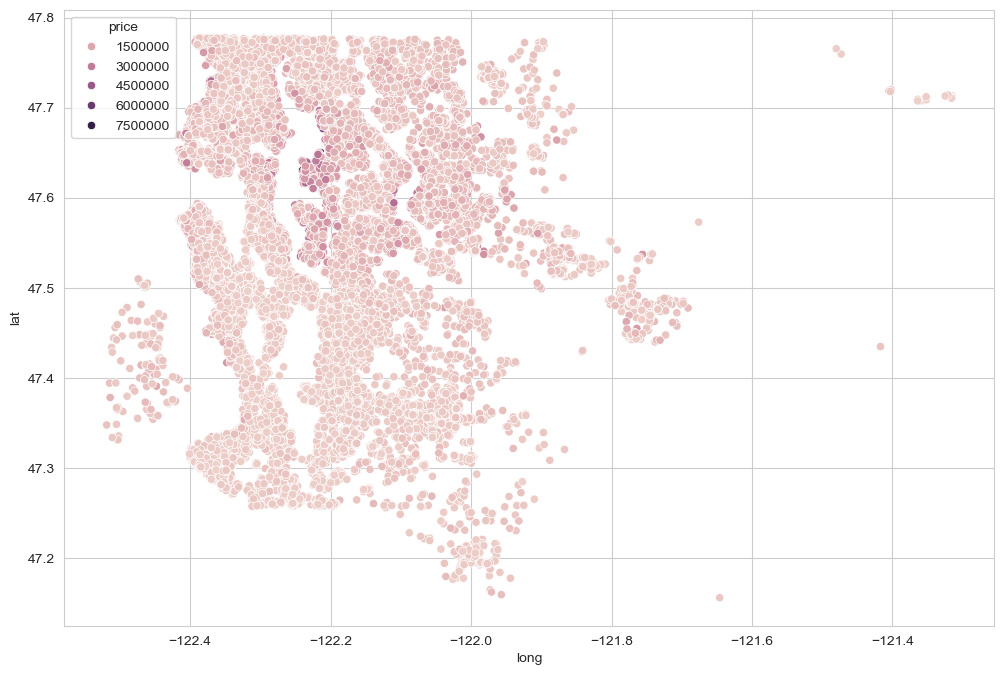

In [73]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x="long", y="lat", data=df, hue="price")
plt.show()

In [74]:
# We will exclude the top 1% of most expensive houses from our visualisation.
len(df) * (0.01)

215.96

In [75]:
df.sort_values("price", ascending=False).head(216)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,built|renovated
7245,7700000.000,6,8.000,12050,27600,2.500,0,3,4,13,8570,3480,47.630,-122.323,3940,8800,1987.000
3910,7060000.000,5,4.500,10040,37325,2.000,1,2,3,11,7680,2360,47.650,-122.214,3930,25449,2001.000
9245,6890000.000,6,7.750,9890,31374,2.000,0,4,3,13,8860,1030,47.630,-122.240,4540,42730,2001.000
4407,5570000.000,5,5.750,9200,35069,2.000,0,0,3,13,6200,3000,47.629,-122.233,3560,24345,2001.000
1446,5350000.000,5,5.000,8000,23985,2.000,0,4,3,12,6720,1280,47.623,-122.220,4600,21750,2009.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7408,1980000.000,6,4.500,4800,9097,2.000,0,0,3,10,3580,1220,47.626,-122.291,2180,6037,2007.000
16511,1980000.000,4,3.500,4500,44384,1.000,0,0,3,12,3340,1160,47.632,-122.192,2540,26287,1990.000
19513,1980000.000,4,4.000,4360,12081,2.000,0,0,3,10,4360,0,47.638,-122.219,2180,10800,2007.000
3278,1970000.000,5,3.750,3940,13738,1.500,0,3,4,9,3940,0,47.620,-122.212,2370,13320,1951.000


In [76]:
non_top_1_perc = df.sort_values("price", ascending=False).iloc[216:]

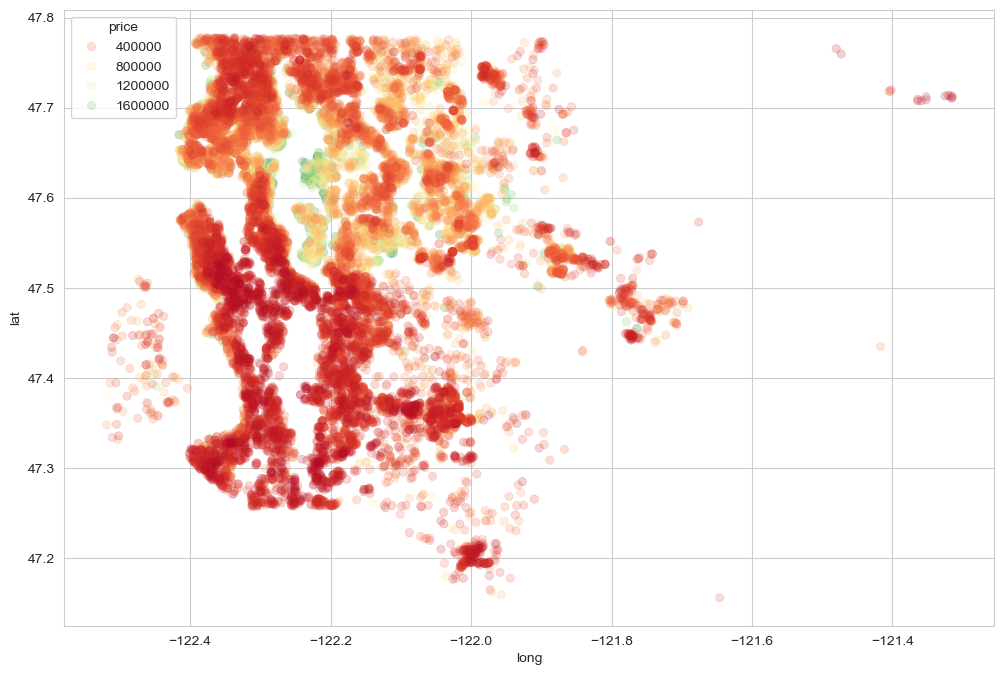

In [77]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="long",
    y="lat",
    data=non_top_1_perc,
    hue="price",
    palette="RdYlGn",
    edgecolor=None,
    alpha=0.2,
)
plt.show()

In [80]:
import folium
import branca.colormap as cm

In [ ]:
# The default location for our map is the mean valus of the "lat" and "long" values.
# Uncomment the code below to see the map
# folium.Map(location=[df["lat"].mean(), df["long"].mean()], zoom_start=10)

In [81]:
# Creating bins for price ranges to derive colours off of.
step_1 = df.price.min()
step_2 = df.price.quantile(0.25)
step_3 = df.price.quantile(0.50)
step_4 = df.price.quantile(0.75)
step_5 = df.price.max()

In [82]:

m = folium.Map(location=[df["lat"].mean(), df["long"].mean()], zoom_start=10)
colormap = cm.StepColormap(
    colors=["green", "yellow", "orange", "red" ],
    index=[step_1, step_2, step_3, step_4, step_5],
    vmin=step_1,
    vmax=step_5,
)
for loc, p in zip(zip(df["lat"], df["long"]), df["price"]):
    folium.Circle(location=loc, radius=1, fill=True, color=colormap(p)).add_to(m)
# m

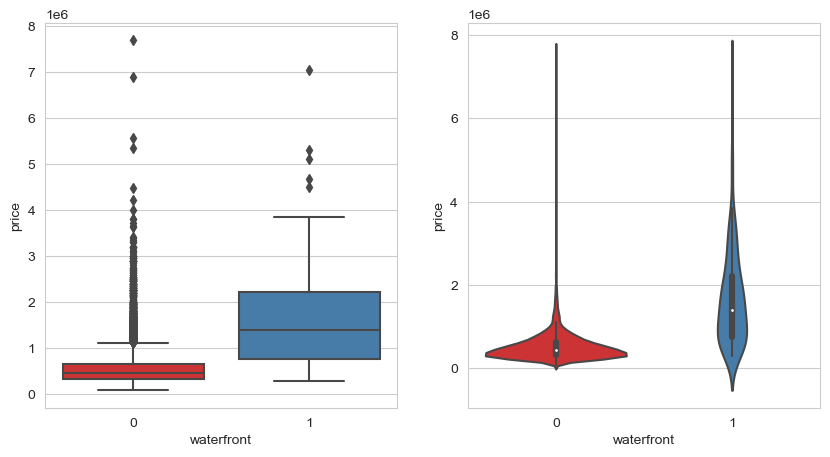

In [65]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(x="waterfront", y="price", data=df, palette="Set1", ax=ax[0])
sns.violinplot(x="waterfront", y="price", data=df, palette="Set1", ax=ax[1])
plt.show()

In [66]:
df.groupby("waterfront").price.mean()

waterfront
0    531757.274
1   1662524.184
Name: price, dtype: float64

### latest data

In [67]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,built|renovated
0,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,98178,47.511,-122.257,1340,5650,1955.000
1,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,98125,47.721,-122.319,1690,7639,1991.000
2,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,98028,47.738,-122.233,2720,8062,1933.000
3,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,98136,47.521,-122.393,1360,5000,1965.000
4,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,98074,47.617,-122.045,1800,7503,1987.000


In [68]:
df.shape

(21596, 18)

## Preprocessing of Data
- Train | Test Split, Scalling

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X = df.drop("price", axis=1)
y = df["price"]

In [163]:
import os

seed = 101
# "TF_DETERMINISTIC_OPS" to "1". This is a TensorFlow feature that, when a random seed is set,
# makes the operations deterministic (i.e., less random). This can also help with reproducibility.
os.environ["TF_DETERMINISTIC_OPS"] = "1"
# 'tf.keras.utils.set_random_seed' is a function that sets the random seed for TensorFlow. 
# Here, we're using the seed value we set earlier. This means that the randomness 
# in any TensorFlow operations will be determined by this seed, and so will be reproducible.
tf.random.set_seed(seed)    #tf.keras.utils.set_random_seed(seed)     This code gives error because set_random_seed function is not available in the tf.keras.utils module. In TensorFlow 2.x

In [164]:
# Split the data into training, validation, and test sets
# X are the features, y are the labels
# test_size determines the proportion of the data to be used for testing
# random_state ensures consistent results

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=seed
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.15, random_state=seed
)

In [165]:
from sklearn.preprocessing import MinMaxScaler  # RobustScaler()

# If there are too many outliers in the data, robust scaler should be used, otherwise minmax can be used.

In [166]:
scaler = MinMaxScaler()

In [167]:
# Scale the data using StandardScaler

# Fit the scaler on the training data
X_train = scaler.fit_transform(X_train)

# Transform the validation and test data using the fitted scaler
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## Modelling & Model Performance

In [168]:
!pip install livelossplot

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from livelossplot import PlotLossesKerasTF 

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [ ]:
# We will use scikitlearn metrics
def eval_metric(actual, pred):
    """Prints regression metrics, calculated using the given
    actual and predicted target values.
    Args:
        actual (list): Actual target values.
        pred (list): Predicted target values.
    Returns:
        None
    """
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mape = mean_absolute_percentage_error(actual, pred)
    score = r2_score(actual, pred)
    print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse, "\nmape:", mape)

In [ ]:
X_train.shape

(16520, 17)

In [ ]:
# Create a sequential model.
model = Sequential()

# Add the first dense layer with 24 units and ReLU activation.
# The input dimension is inferred from the shape of the training data.
model.add(Dense(24, activation="relu", input_dim=X_train.shape[1]))

# Add an activation layer with ReLU activation.
# This can be added separately after each layer.
# model.add(Activation("relu"))

# Add subsequent dense layers with 24, 12, and 6 units, respectively, all with ReLU activation.
model.add(Dense(24, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(6, activation="relu"))

# Add the output layer with 1 unit. Here we don't have an activation function bec we are working of a regression problem.
model.add(Dense(1))

# Compile the model with Adam optimizer and MSE loss.
model.compile(optimizer="adam", loss="mse")

In [179]:
# if you want to see the summary of the architecture before the fit process, you must define the input_dim
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 24)                432       
_________________________________________________________________
dense_46 (Dense)             (None, 24)                600       
_________________________________________________________________
dense_47 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_48 (Dense)             (None, 6)                 78        
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 7         
Total params: 1,417
Trainable params: 1,417
Non-trainable params: 0
_________________________________________________________________


In [180]:
# Get the initial weights of the model
model.weights

[<tf.Variable 'dense_45/kernel:0' shape=(17, 24) dtype=float32, numpy=
 array([[ 1.8361441 ,  1.6709172 ,  1.4595757 ,  1.6455162 ,  1.7398106 ,
          2.0110393 ,  2.2243862 ,  1.9099128 ,  1.7254435 ,  1.6546437 ,
          1.6606345 ,  2.0909503 ,  2.0900407 ,  1.7618614 ,  1.8342813 ,
          1.3081253 ,  0.28321445,  1.5771977 ,  1.9052726 ,  1.5750369 ,
          1.7021009 ,  2.1139243 ,  2.179918  ,  1.6116579 ],
        [ 2.416281  ,  2.5557659 ,  2.6689544 ,  2.8052597 ,  2.0504842 ,
          2.5366902 ,  2.8342104 ,  2.4597228 ,  2.600239  ,  2.5772746 ,
          2.5647225 ,  2.675002  ,  2.2259939 ,  2.5324724 ,  2.1482644 ,
          2.3432958 , -0.3730832 ,  2.0857246 ,  2.3958364 ,  2.8389308 ,
          2.5371802 ,  2.8667805 ,  2.2782643 ,  2.7588596 ],
        [ 3.2701335 ,  2.9900985 ,  2.825167  ,  2.824834  ,  2.918326  ,
          2.685768  ,  3.09098   ,  2.9521527 ,  2.941905  ,  3.1048748 ,
          2.7451148 ,  2.7221234 ,  2.6864038 ,  2.9514594 ,  2.7

In [182]:
# Set the number of epochs to train the model for.
epoch = 200

# Set the batch size for training the model.
batch_size = 512

# Set the patience for early stopping.
patience = 3

# Set the learning rate for the optimizer.
lr = 0.003

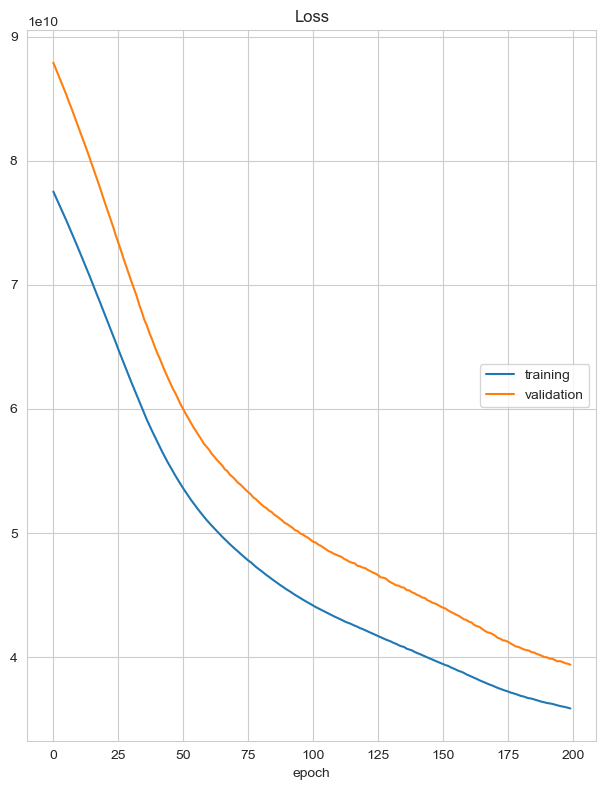

Loss
	training         	 (min: 35864985600.000, max: 77526810624.000, cur: 35864985600.000)
	validation       	 (min: 39385882624.000, max: 87918862336.000, cur: 39385882624.000)


In [183]:
# Fit the model on the training data.
model.fit(x=X_train,
          y=y_train, 

          # Use the validation data for monitoring.
          validation_data=(X_val, y_val),

          # Specify the batch size.
          batch_size=batch_size,

          # Specify the number of epochs.
          epochs=epoch,

          # Use a callback for plotting the losses.
          callbacks=[PlotLossesKerasTF()])

In [107]:
# Get the weights of the model after training
model.weights

[<tf.Variable 'dense_10/kernel:0' shape=(17, 24) dtype=float32, numpy=
 array([[-1.18157423e+00, -9.29636717e-01, -1.17180502e+00,
         -1.31436467e+00, -1.51006019e+00, -1.85785517e-01,
         -1.65654171e+00, -3.44439775e-01, -1.76218653e+00,
         -1.06449080e+00, -1.09500742e+00, -2.39793546e-02,
         -1.89433289e+00, -1.48214972e+00, -1.77759552e+00,
         -3.66639793e-01, -9.23473418e-01, -1.17548895e+00,
         -1.38480377e+00, -1.41900086e+00, -1.47970092e+00,
         -9.32714522e-01, -1.22218311e+00, -1.49356318e+00],
        [ 2.16326928e+00,  2.27466249e+00,  2.31620502e+00,
          2.24778295e+00,  2.17688060e+00,  3.43892187e-01,
          2.82684636e+00,  6.34943843e-02,  2.54348946e+00,
          2.12667251e+00,  2.79548597e+00,  1.35491565e-01,
          1.93364418e+00,  2.25093532e+00,  2.34958267e+00,
         -9.09901708e-02,  2.88558221e+00,  2.27433562e+00,
          2.68251586e+00,  2.70143819e+00,  2.45659208e+00,
          2.87076974e+00,  3

In [108]:
# Convert the history of the model to a pandas DataFrame.
pd.DataFrame(model.history.history)

,loss,val_loss
0,425893625856.000,439460003840.000
1,425893396480.000,439459643392.000
2,425892577280.000,439457808384.000
3,425888546816.000,439449878528.000
4,425872818176.000,439421435904.000
...,...,...
295,36308893696.000,40091287552.000
296,36258238464.000,40030527488.000
297,36208680960.000,39929499648.000
298,36152115200.000,39933661184.000


<Axes: >

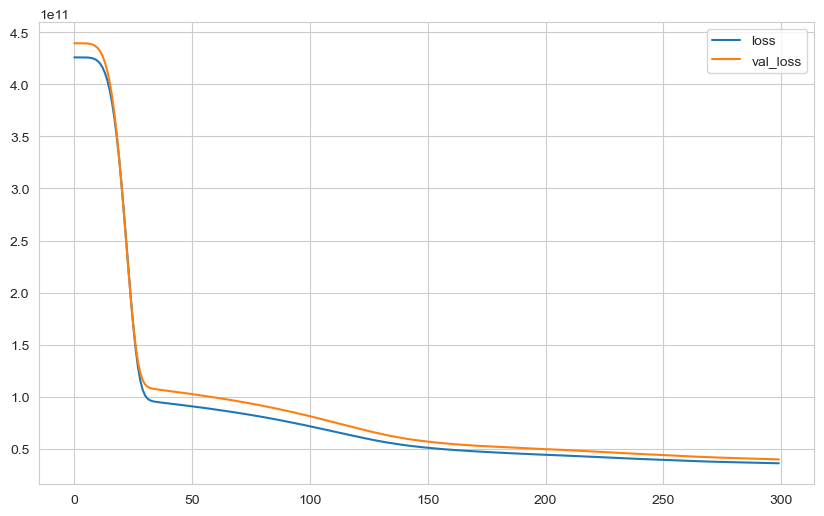

In [109]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [110]:
# Evaluate the model on the test data.
# The verbose argument controls the amount of output printed during evaluation.
# Setting verbose=0 suppresses all output.
model.evaluate(X_test, y_test, verbose=0)

33246779392.0

In [111]:
y_pred = model.predict(X_test, verbose=1)

20/68 [=======>......................] - ETA: 0s 68/68 [==============================] - 0s 4ms/step


68/68 [==============================] - 0s 4ms/step


In [112]:
eval_metric(y_test, y_pred)

r2_score: 0.7412293919344568 
mae: 114843.11660873631 
mse: 33246786120.59128 
rmse: 182337.01248126032 
mape: 0.22305765162118132


### learning_rate

In [113]:
from tensorflow.keras.optimizers import Adam

In [114]:
# Define the model architecture
model = Sequential()

# Add the first hidden layer with 24 units and ReLU activation
# The input dimension is set to the number of features in the training data
model.add(Dense(24, activation="relu", input_dim=X_train.shape[1]))

# Add the second hidden layer with 24 units and ReLU activation
model.add(Dense(24, activation="relu"))

# Add the third hidden layer with 12 units and ReLU activation
model.add(Dense(12, activation="relu"))

# Add the fourth hidden layer with 6 units and ReLU activation
model.add(Dense(6, activation="relu"))

# Add the output layer with 1 unit (since we are predicting a single value)
model.add(Dense(1))

# Define the optimizer
# The default learning rate value for Adam is 0.001
opt = Adam(learning_rate=lr)

# Compile the model
# Set the optimizer and loss function
model.compile(optimizer=opt, loss="mse")

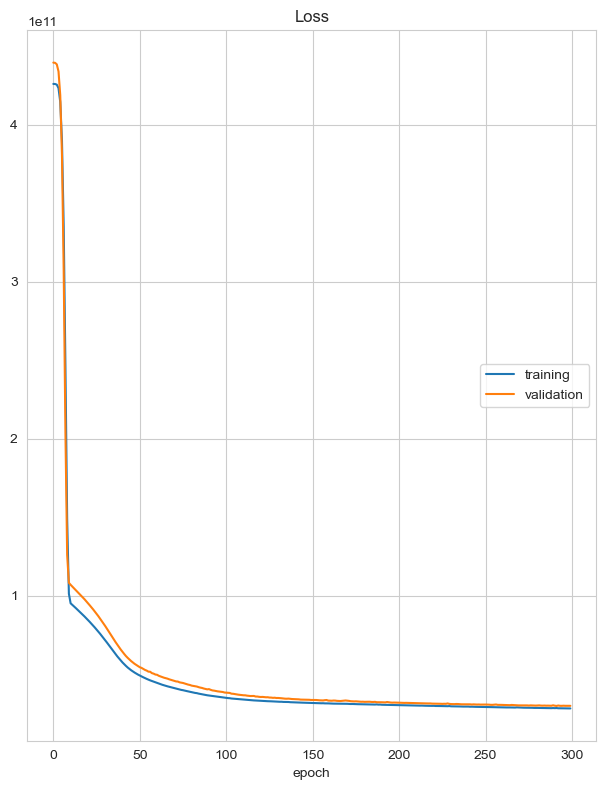

Loss
	training         	 (min: 28393269248.000, max: 425891266560.000, cur: 28393269248.000)
	validation       	 (min: 29988192256.000, max: 439451123712.000, cur: 30056204288.000)


In [115]:
# Fit the model on the training data.
model.fit(x=X_train,
          y=y_train, 

          # Use the validation data for monitoring.
          validation_data=(X_val, y_val),

          # Specify the batch size.
          batch_size=batch_size,

          # Specify the number of epochs.
          epochs=epoch,

          # Use a callback for plotting the losses.
          callbacks=[PlotLossesKerasTF()])

<Axes: >

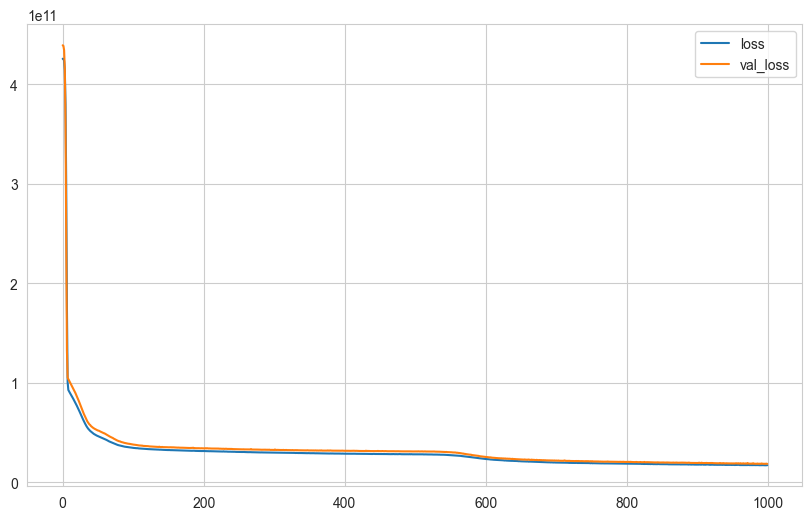

In [110]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [116]:
y_pred = model.predict(X_test)

In [117]:
eval_metric(y_test, y_pred)

r2_score: 0.7985611004650814 
mae: 100518.90009042245 
mse: 25880821857.12683 
rmse: 160875.17476953001 
mape: 0.1903835343919895


### EarlyStopping

In [118]:
from tensorflow.keras.callbacks import EarlyStopping

In [119]:
tf.random.set_seed(seed)

# Create a sequential model
model = Sequential()

# Add a dense layer with 24 units, ReLU activation, and input dimension equal to the number of features in the training data
model.add(Dense(24, activation="relu", input_dim=X_train.shape[1]))

# Add another dense layer with 24 units and ReLU activation
model.add(Dense(24, activation="relu"))

# Add another dense layer with 12 units and ReLU activation
model.add(Dense(12, activation="relu"))

# Add another dense layer with 6 units and ReLU activation
model.add(Dense(6, activation="relu"))

# Add a final dense layer with 1 unit (output layer)
model.add(Dense(1))

# Define the optimizer
opt = Adam(learning_rate=0.003)

# Compile the model with the optimizer and mean squared error loss function
model.compile(optimizer=opt, loss="mse")

In [120]:
# Create an EarlyStopping callback instance
early_stop = EarlyStopping(
    # Monitor the 'val_loss' metric during training
    monitor="val_loss",
    # Set the mode to 'min' as we want to minimize the validation loss
    mode="min",
    # Print a message every time the callback is triggered
    verbose=1,
    # Wait for # epochs without improvement before stopping training
    patience=patience,
    # Restore the model weights that achieved the best validation loss
    restore_best_weights=True
)

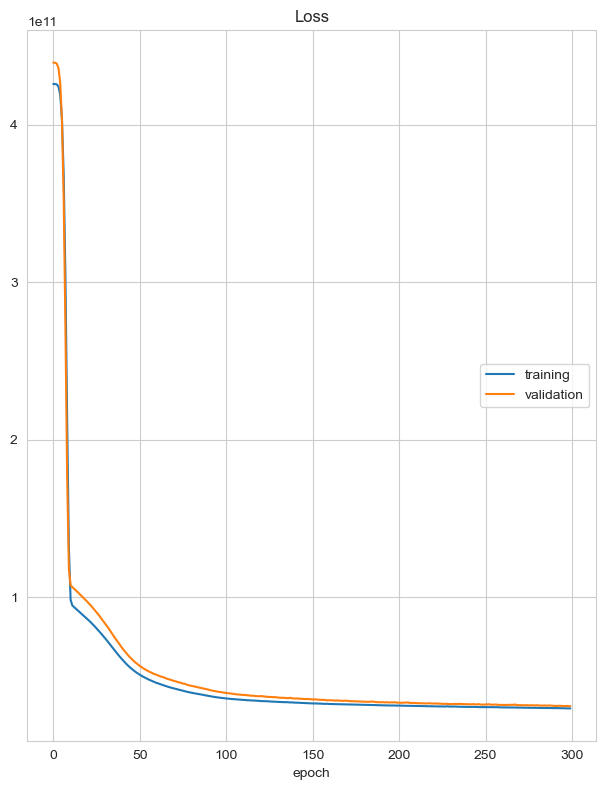

Loss
	training         	 (min: 29316599808.000, max: 425892675584.000, cur: 29316599808.000)
	validation       	 (min: 30768527360.000, max: 439456038912.000, cur: 30783506432.000)


In [122]:
# Fit the model to the training data
model.fit(
    x=X_train,  
    y=y_train,  

    # The validation data for early stopping
    validation_data=(X_val, y_val),  

    # The batch size for training
    batch_size=batch_size, 
     
    # The number of epochs to train for
    epochs=epoch,

    callbacks=[
        early_stop,  # A callback to stop training if the model is not improving on the validation data
        PlotLossesKerasTF(),  # A callback to plot the training and validation losses during training
    ],
)

<Axes: >

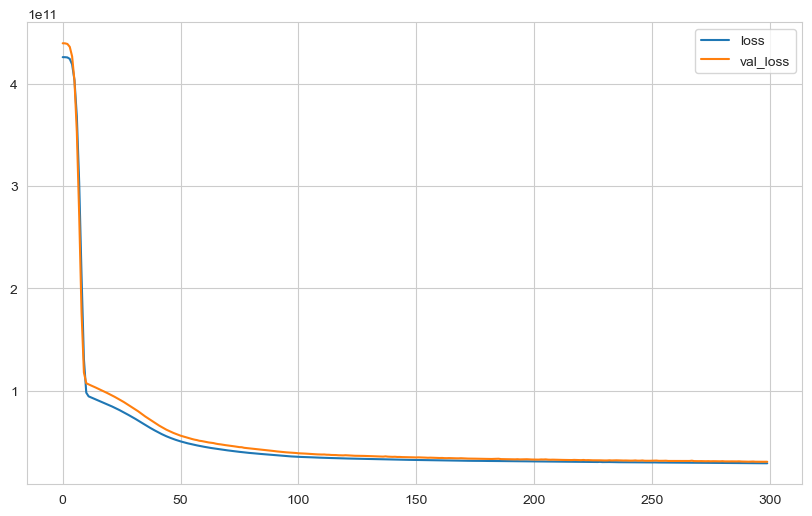

In [123]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [124]:
y_pred = model.predict(X_test)

In [125]:
eval_metric(y_test, y_pred)

r2_score: 0.7955118113143272 
mae: 102115.57599283854 
mse: 26272593801.29326 
rmse: 162088.22844763668 
mape: 0.1970789636908472


### Dropout

The Dropout layer randomly sets input units to 0 with a frequency of `rate`
at each step during training time, which helps prevent overfitting.

Dropout refers to ignoring units (i.e. neurons) during the training phase of certain set of neurons which is chosen at random. By “ignoring”, I mean these units are not considered during a particular forward or backward pass.

For each hidden layer, for each training sample, for each iteration, ignore (zero out) a random fraction, p, of nodes (and corresponding activations).

![dropout.PNG](https://miro.medium.com/max/1400/1*nty4xtm9UBuWLqxHVaamjw.png)
[Source-1](https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5)
[Source-2](https://medium.com/unpackai/introduction-of-dropout-and-ensemble-model-in-the-history-of-deep-learning-a4c2a512dcca)

In [126]:
from tensorflow.keras.layers import Dropout

In [127]:
tf.random.set_seed(seed)

# Create a sequential model
model = Sequential()

# Add the first dense layer with 24 units, ReLU activation, and input dimension equal to the number of features in the training data
model.add(Dense(24, activation="relu", input_dim=X_train.shape[1]))

# Add a dropout layer with a rate of 0.2 to prevent overfitting
model.add(Dropout(0.2))

# Add another dense layer with 24 units and ReLU activation
model.add(Dense(24, activation="relu"))

# Add another dropout layer with a rate of 0.2
model.add(Dropout(0.2))

# Add another dense layer with 12 units and ReLU activation
model.add(Dense(12, activation="relu"))

# Add another dropout layer with a rate of 0.2
model.add(Dropout(0.2))

# Add another dense layer with 6 units and ReLU activation
model.add(Dense(6, activation="relu"))

# Add a final dropout layer with a rate of 0.2
model.add(Dropout(0.2))

# Add a final dense layer with 1 unit (output layer)
model.add(Dense(1))

# Define the optimizer
opt = Adam(learning_rate=0.003)

# Compile the model with the optimizer and mean squared error loss function
model.compile(optimizer=opt, loss="mse")

In [128]:
# Create an EarlyStopping callback instance
early_stop = EarlyStopping(
    # Monitor the 'val_loss' metric during training
    monitor="val_loss",
    # Set the mode to 'min' as we want to minimize the validation loss
    mode="min",
    # Print a message every time the callback is triggered
    verbose=1,
    # Wait for 100 epochs without improvement before stopping training
    patience=patience,
    # Restore the model weights that achieved the best validation loss
    restore_best_weights=True
)

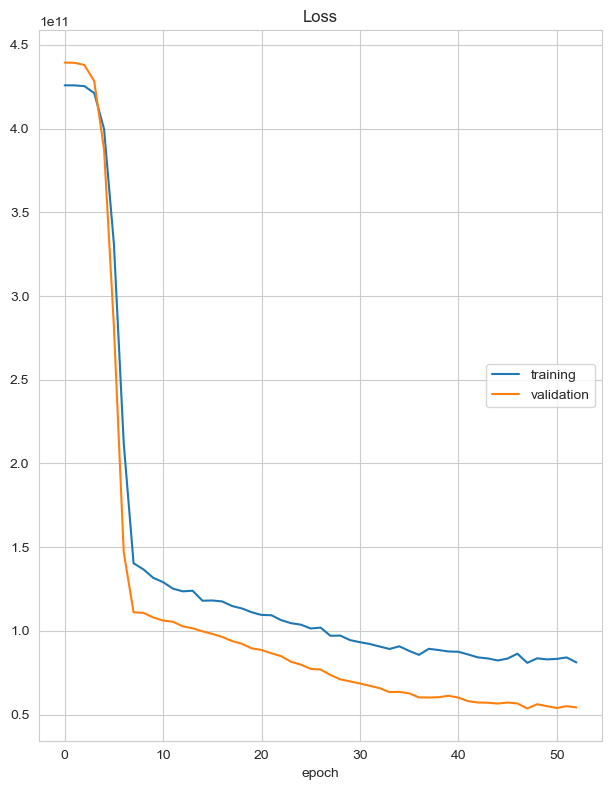

Loss
	training         	 (min: 80894074880.000, max: 425892839424.000, cur: 81127129088.000)
	validation       	 (min: 53655797760.000, max: 439456399360.000, cur: 54272544768.000)
Epoch 00053: early stopping


In [129]:
# Fit the model to the training data
model.fit(
    x=X_train,  
    y=y_train,  

    # The validation data for early stopping
    validation_data=(X_val, y_val),  

    # The batch size for training
    batch_size=batch_size, 
     
    # The number of epochs to train for
    epochs=epoch,

    callbacks=[
        early_stop,  # A callback to stop training if the model is not improving on the validation data
        PlotLossesKerasTF(),  # A callback to plot the training and validation losses during training
    ],
)

<Axes: >

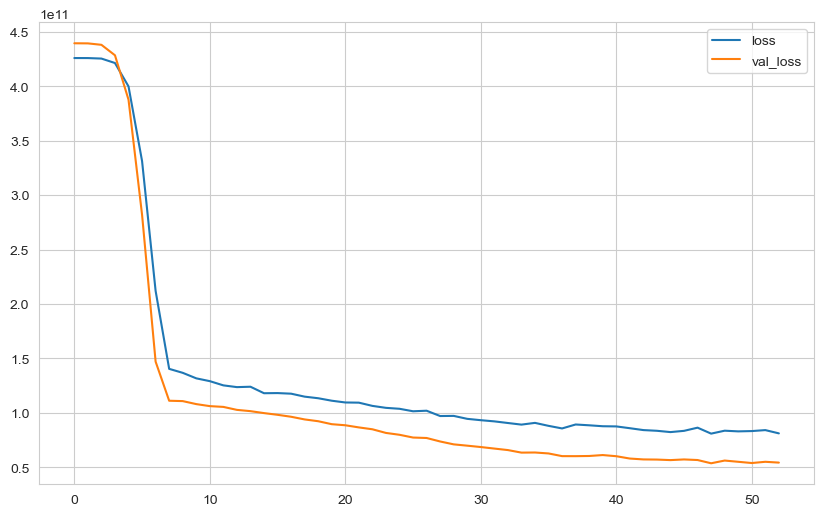

In [130]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [131]:
y_pred = model.predict(X_test)

In [132]:
eval_metric(y_test, y_pred)

r2_score: 0.6635074796773085 
mae: 122594.2119470667 
mse: 43232478904.689384 
rmse: 207924.2143298596 
mape: 0.2286523360867558


## Saving Final Model and Scaler

In [142]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.15, random_state=seed
)

In [143]:
import pickle

pickle.dump(scaler, open("scaler_kc_house", "wb"))

In [144]:
tf.random.set_seed(seed)

# Create a sequential model
model = Sequential()

# Add the first hidden layer with 24 units, ReLU activation, and input dimension equal to the number of features in the training data
model.add(Dense(24, activation="relu", input_dim=X_train.shape[1]))

# Add the second hidden layer with 24 units and ReLU activation
model.add(Dense(24, activation="relu"))

# Add the third hidden layer with 12 units and ReLU activation
model.add(Dense(12, activation="relu"))

# Add the fourth hidden layer with 6 units and ReLU activation
model.add(Dense(6, activation="relu"))

# Add the output layer with 1 unit and linear activation
model.add(Dense(1))

# Define the optimizer and learning rate
opt = Adam(learning_rate=0.003)

# Compile the model with the specified optimizer and loss function
model.compile(optimizer=opt, loss="mse")

In [145]:
# Create an EarlyStopping callback instance
early_stop = EarlyStopping(
    # Monitor the 'val_loss' metric during training
    monitor="val_loss",
    # Set the mode to 'min' as we want to minimize the validation loss
    mode="min",
    # Print a message every time the callback is triggered
    verbose=1,
    # Wait for 100 epochs without improvement before stopping training
    patience=100,
    # Restore the model weights that achieved the best validation loss
    restore_best_weights=True
)

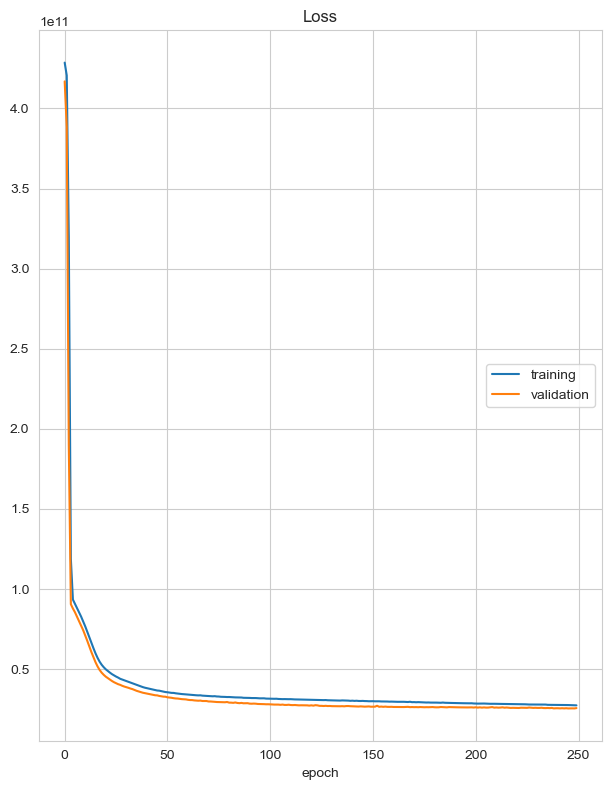

Loss
	training         	 (min: 27382663168.000, max: 428610977792.000, cur: 27382663168.000)
	validation       	 (min: 25455591424.000, max: 416901496832.000, cur: 25672826880.000)


In [146]:
# Fit the model to the training data
model.fit(
    x=X_train,
    y=y_train,
    # The validation data for early stopping
    validation_data=(X_test, y_test),
    # The batch size for training
    batch_size=128,
    # The number of epochs to train for
    epochs=250,
    # A list of callbacks to use during training
    callbacks=[
        early_stop,  # A callback to stop training if the model is not improving on the validation data
        PlotLossesKerasTF()  # A callback to plot the training and validation losses during training
        ],
)

<Axes: >

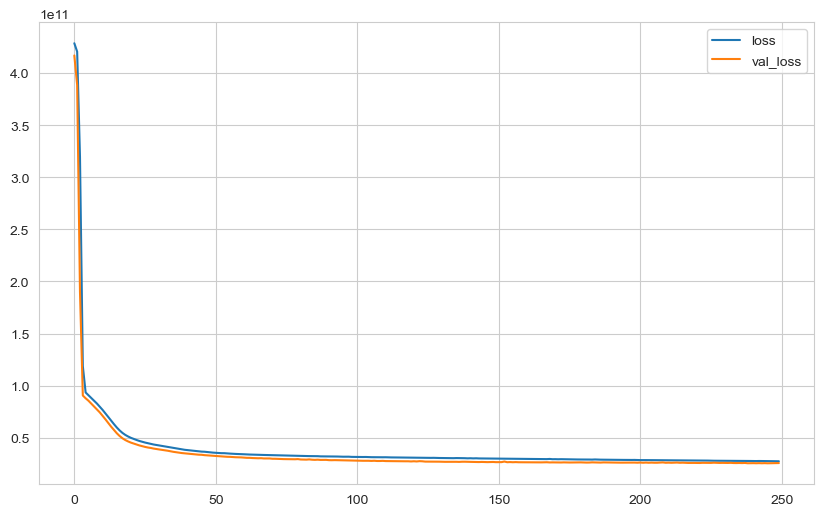

In [147]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [148]:
y_pred = model.predict(X_test)

In [149]:
eval_metric(y_test, y_pred)

r2_score: 0.8001800131360708 
mae: 100201.89822048611 
mse: 25672824342.561104 
rmse: 160227.41445383528 
mape: 0.19403805847590827


In [150]:
model.save("model_kc_house.h5")  # creates a HDF5 file 'my_model.h5'

## Loading Model and Scaler

In [151]:
from tensorflow.keras.models import load_model

In [152]:
# Load the saved Keras model
model_kc_house = load_model("model_kc_house.h5")

# Load the saved scaler object
scaler_kc_house = pickle.load(open("scaler_kc_house", "rb"))

## Prediction

In [153]:
single_house = df.drop("price", axis=1).iloc[[0], :]
single_house

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,built|renovated
0,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,98178,47.511,-122.257,1340,5650,1955.000


In [154]:
single_house = scaler_kc_house.transform(single_house)
single_house

array([[0.2       , 0.06666667, 0.06150342, 0.0030592 , 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.08960177,
        0.        , 0.89393939, 0.57149751, 0.21760797, 0.15304348,
        0.00891317, 0.47826087]])

In [155]:
model_kc_house.predict(single_house)

array([[276377.16]], dtype=float32)

In [156]:
df.iloc[0][0]

221900.0

## Comparison with ML

### Linear Regression

In [157]:
from sklearn.linear_model import LinearRegression

In [158]:
ln_model = LinearRegression()
ln_model.fit(X_train, y_train)

# Prediction
y_pred = ln_model.predict(X_test)
y_pred_train = ln_model.predict(X_train)

# Evaluation
eval_metric(y_test, y_pred)
print("-*" * 15)
eval_metric(y_train, y_pred_train)

r2_score: 0.7088843488439551 
mae: 123825.18703203832 
mse: 37402469556.70564 
rmse: 193397.18083960182 
mape: 0.25301273723738243
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
r2_score: 0.6887820793558921 
mae: 128371.9692055589 
mse: 41523220247.87596 
rmse: 203772.4717617077 
mape: 0.25711343123249275


### Random Forest

In [159]:
from sklearn.ensemble import RandomForestRegressor

In [160]:
rf_model = RandomForestRegressor(random_state=seed)
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)
y_pred_train = rf_model.predict(X_train)

# Evaluate
eval_metric(y_test, y_pred)
print("-*" * 15)
eval_metric(y_train, y_pred_train)

r2_score: 0.8892902767381425 
mae: 66915.58276112215 
mse: 14223958888.810677 
rmse: 119264.23977375061 
mape: 0.1269151576407554
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
r2_score: 0.9824733937061493 
mae: 26480.46381265785 
mse: 2338429393.240504 
rmse: 48357.309615408754 
mape: 0.049736088865254165


END OF THE PROJECT